In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
url = '/Users/verapinto/Desktop/Projects/beauxbatons/global_energy_consumption.csv'
ec = pd.read_csv(url)
ec.head()

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


In [93]:
ec.dtypes

Country                             object
Year                                 int64
Total Energy Consumption (TWh)     float64
Per Capita Energy Use (kWh)        float64
Renewable Energy Share (%)         float64
Fossil Fuel Dependency (%)         float64
Industrial Energy Use (%)          float64
Household Energy Use (%)           float64
Carbon Emissions (Million Tons)    float64
Energy Price Index (USD/kWh)       float64
dtype: object

In [95]:
# Check for null values in the dataset
null_counts = ec.isnull().sum()
print(null_counts)

Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64


In [173]:
# Group by Country and Year with aggregation
aggregated_data = ec.groupby(['Country', 'Year']).agg({
    'Total Energy Consumption (TWh)': 'sum',
    'Per Capita Energy Use (kWh)': 'sum',
    'Renewable Energy Share (%)': 'mean',
    'Fossil Fuel Dependency (%)': 'mean',
    'Industrial Energy Use (%)': 'mean',
    'Household Energy Use (%)': 'mean',
    'Carbon Emissions (Million Tons)': 'sum',
    'Energy Price Index (USD/kWh)': 'mean'})

# Reset the index to access "Year" as a column
aggregated_data_reset = aggregated_data.reset_index()

# Filter for years 2020 to 2024
filtered_data = aggregated_data_reset[aggregated_data_reset['Year'].between(2020, 2024)]

# Display the filtered data
filtered_data


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
20,Australia,2020,188146.90,1045187.48,49.166750,40.378750,40.522500,27.069750,94873.22,0.240750
21,Australia,2021,195881.41,1095667.89,43.379231,46.748718,38.723077,23.187179,107768.72,0.260769
22,Australia,2022,212780.81,1067310.53,46.678750,44.335250,38.423000,26.026750,109937.68,0.256500
23,Australia,2023,178564.47,910783.53,53.013611,44.270833,41.125000,25.763611,105924.14,0.319444
24,Australia,2024,227091.95,1095080.56,49.571136,49.088864,39.523636,25.832955,109404.74,0.292500
45,Brazil,2020,268126.81,1154071.16,45.097407,47.807778,38.699630,26.968519,135347.39,0.267407
46,Brazil,2021,181313.02,913041.10,46.182000,42.500250,41.151000,25.736750,107587.25,0.304250
47,Brazil,2022,204974.01,684175.66,53.551212,47.268182,39.180000,24.401212,79743.17,0.315758
48,Brazil,2023,151484.02,724469.81,49.746207,47.671379,40.593448,25.655862,71568.60,0.280000
49,Brazil,2024,202661.91,1099036.41,51.727179,44.384615,41.492821,25.888974,108307.31,0.284615


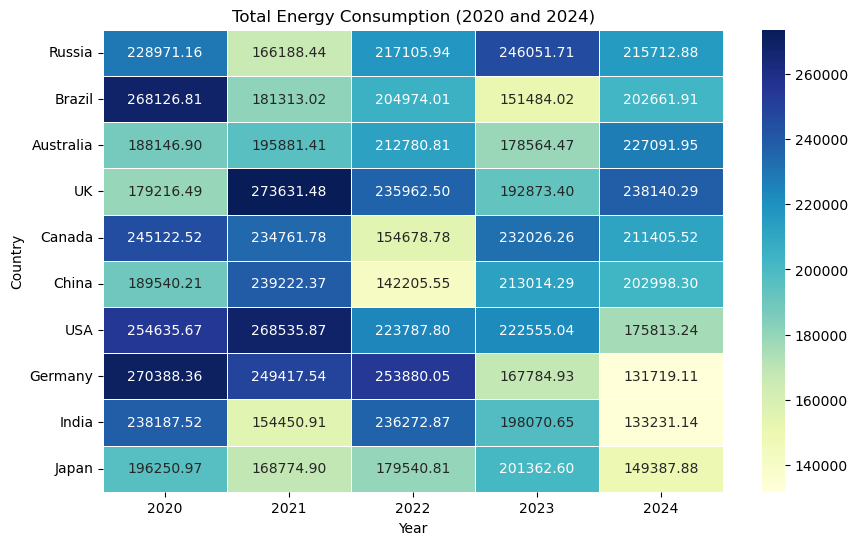

In [247]:
# Sort by 2024 values in descending order
sorted_2024 = filtered_data[filtered_data['Year'] == 2024].sort_values(by='Total Energy Consumption (TWh)', ascending=False)
sorted_countries = sorted_2024['Country']

# Reorder the filtered data based on the sorted countries
filtered_data['Country'] = pd.Categorical(filtered_data['Country'], categories=sorted_countries, ordered=True)
filtered_data = filtered_data.sort_values(by=['Country', 'Year'])

# Pivot data for heatmap
heatmap_data = filtered_data.pivot(index='Country', columns='Year', values='Total Energy Consumption (TWh)')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title('Total Energy Consumption (2020 and 2024)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

/var/folders/4g/4yj9rs3x2mxd3r_wz6p0pv080000gn/T/ipykernel_4228/1104573030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Country'] = pd.Categorical(filtered_data['Country'], categories=sorted_countries, ordered=True)


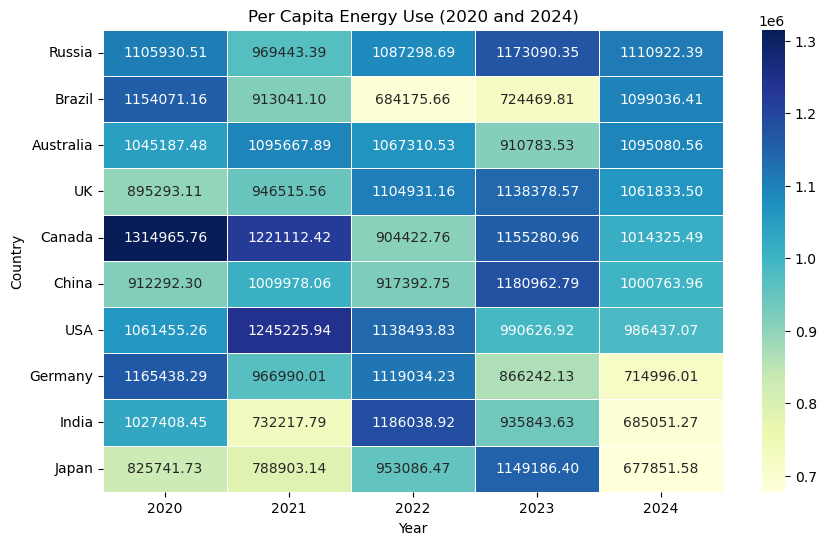

In [241]:
# Sort by 2024 values in descending order
sorted_2024 = filtered_data[filtered_data['Year'] == 2024].sort_values(by='Per Capita Energy Use (kWh)', ascending=False)
sorted_countries = sorted_2024['Country']

# Reorder the filtered data based on the sorted countries
filtered_data['Country'] = pd.Categorical(filtered_data['Country'], categories=sorted_countries, ordered=True)
filtered_data = filtered_data.sort_values(by=['Country', 'Year'])

# Pivot data for heatmap
heatmap_data = filtered_data.pivot(index='Country', columns='Year', values='Per Capita Energy Use (kWh)')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title('Per Capita Energy Use (2020 and 2024)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

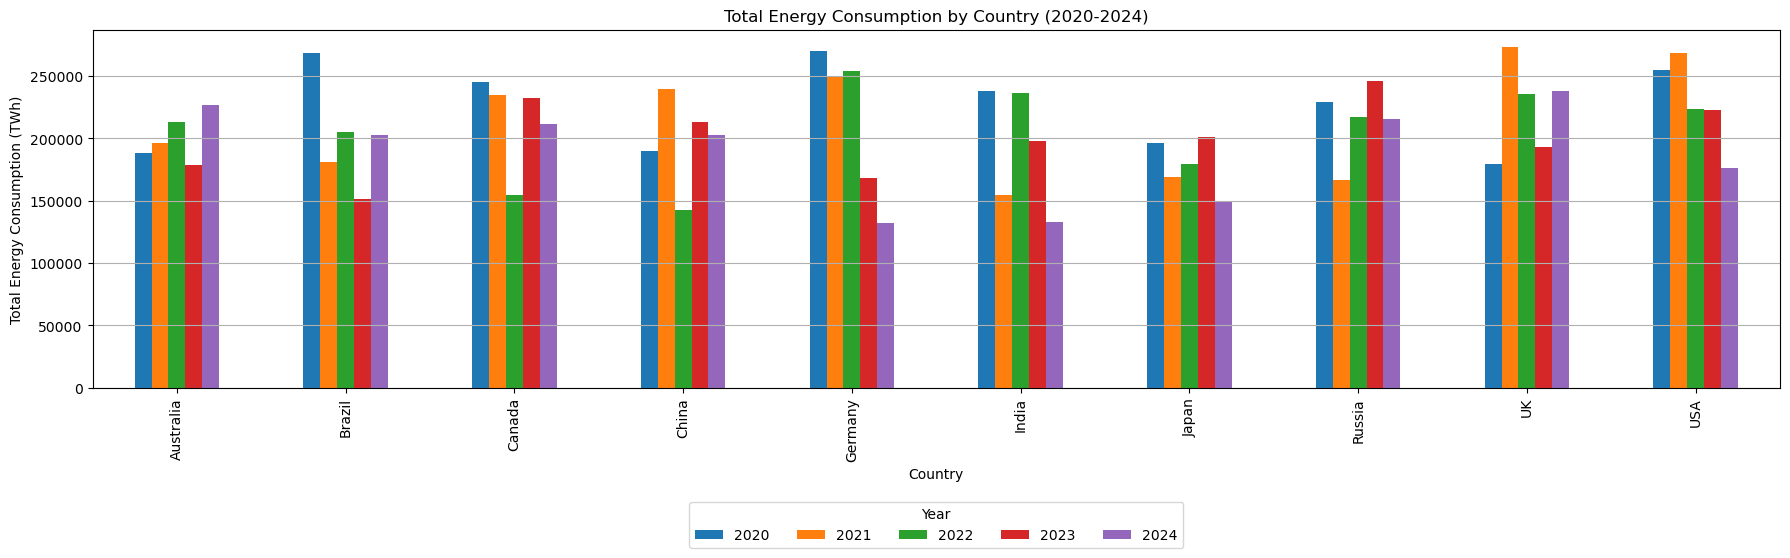

In [141]:
# Filter data for years 2020 to 2024
filtered_data = ec[ec['Year'].between(2020, 2024)]

# Aggregate duplicate entries (if any)
aggregated_data = filtered_data.groupby(['Country', 'Year']).sum().reset_index()

# Pivot data for bar chart
bar_chart_data = aggregated_data.pivot(index='Country', columns='Year', values='Total Energy Consumption (TWh)')

# Plot the bar chart
bar_chart_data.plot(kind='bar', figsize=(18, 6))

# Set the legend below the chart
plt.legend(title='Year', loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=5)  # Adjust ncol as needed
plt.xlabel('Country')  # Country on the x-axis
plt.ylabel('Total Energy Consumption (TWh)')  # Total energy consumption on the y-axis
plt.title('Total Energy Consumption by Country (2020-2024)')
plt.grid(axis='y')  # Add gridlines to the y-axis for better readability

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


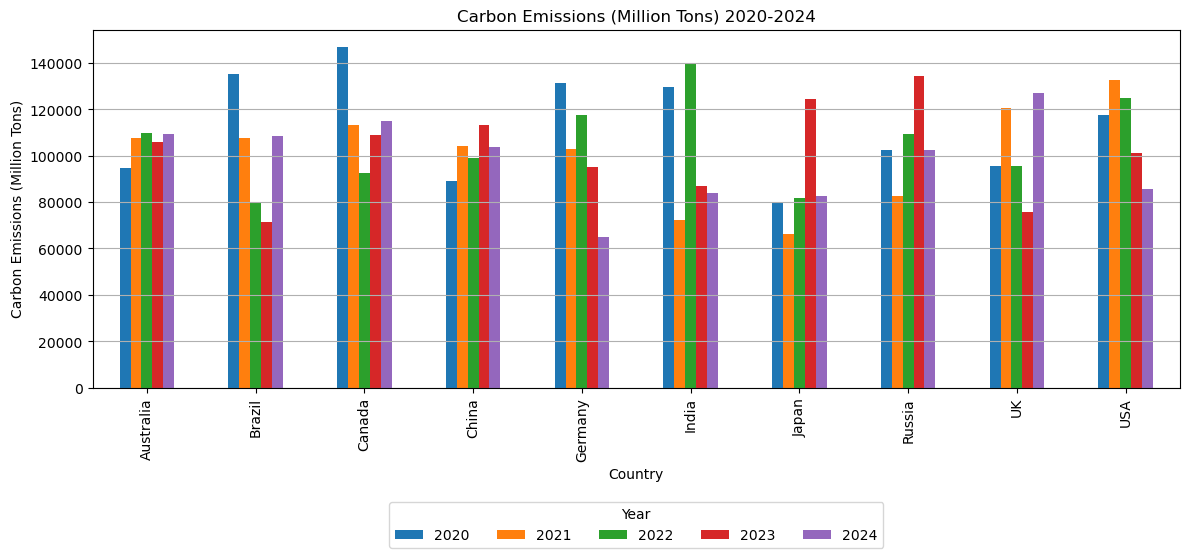

In [177]:

# Aggregate duplicate entries (if any)
aggregated_data = filtered_data.groupby(['Country', 'Year']).sum().reset_index()

# Pivot data for bar chart
bar_chart_data = aggregated_data.pivot(index='Country', columns='Year', values='Carbon Emissions (Million Tons)')

# Plot the bar chart
bar_chart_data.plot(kind='bar', figsize=(12, 6))

# Set the legend below the chart
plt.legend(title='Year', loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=5)  # Adjust ncol as needed
plt.xlabel('Country')  # Country on the x-axis
plt.ylabel('Carbon Emissions (Million Tons)')  # Total energy consumption on the y-axis
plt.title('Carbon Emissions (Million Tons) 2020-2024')
plt.grid(axis='y')  # Add gridlines to the y-axis for better readability

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [253]:
# Pivot data for comparison
pivot_data = filtered_data.pivot(index='Country', columns='Year', values='Carbon Emissions (Million Tons)')

# Calculate the decrease in emissions from 2020 to 2024
pivot_data['Decrease'] = pivot_data[2020] - pivot_data[2024]

# Sort by the largest decrease and select the top 3 countries
top_3_countries = pivot_data.sort_values(by='Decrease', ascending=False).head(3)

# Display the results
print("Top 3 Countries with Biggest Decrease in Carbon Emissions (Million Tons) (2020 vs 2024):\n", top_3_countries)

Top 3 Countries with Biggest Decrease in Carbon Emissions (Million Tons) (2020 vs 2024):
 Year          2020       2021       2022       2023       2024  Decrease
Country                                                                 
Germany  131128.45  102793.36  117617.14   95253.72   64775.67  66352.78
India    129459.91   72149.20  139769.14   86910.23   83981.53  45478.38
Canada   147048.78  113209.79   92740.53  109043.46  115038.67  32010.11


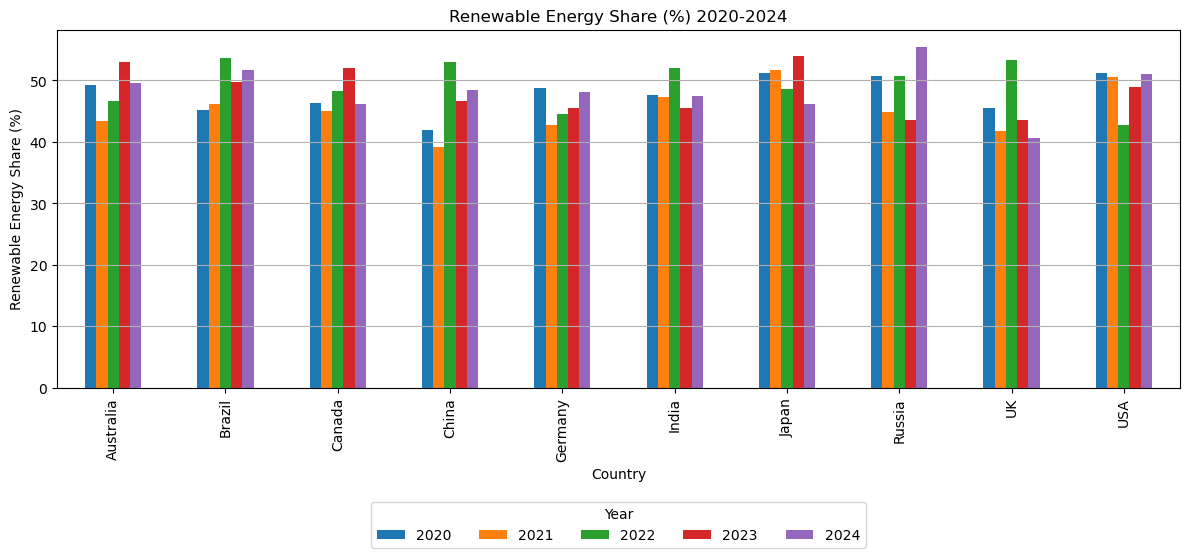

In [169]:
# Filter data for years 2020 to 2024
filtered_data = ec[ec['Year'].between(2020, 2024)]

# Handle duplicate entries by aggregating (e.g., calculating the mean)
aggregated_data = filtered_data.groupby(['Country', 'Year']).mean().reset_index()

# Pivot data for bar chart
bar_chart_data = aggregated_data.pivot(index='Country', columns='Year', values='Renewable Energy Share (%)')

# Plot the bar chart
bar_chart_data.plot(kind='bar', figsize=(12, 6))

# Set the legend below the chart
plt.legend(title='Year', loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=5)  # Adjust ncol as needed
plt.xlabel('Country')  # Country on the x-axis
plt.ylabel('Renewable Energy Share (%)')  # Total energy consumption on the y-axis
plt.title('Renewable Energy Share (%) 2020-2024')
plt.grid(axis='y')  # Add gridlines to the y-axis for better readability

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [219]:
# Function to get top 3 countries by Renewable Energy Share for each year
def get_top_3_countries_by_year(dataframe, metric):
    # Group by Year and get the top 3 countries for the metric
    return dataframe.groupby('Year').apply(lambda x: x.nlargest(3, metric)).reset_index(drop=True)

# Get the top 3 countries for Renewable Energy Share (%)
top_3_renewable = get_top_3_countries_by_year(filtered_data, 'Renewable Energy Share (%)')

# Filter to show only the desired columns
top_3_renewable = top_3_renewable[['Country', 'Year', 'Renewable Energy Share (%)','Fossil Fuel Dependency (%)','Industrial Energy Use (%)', 'Household Energy Use (%)']]

# Display the results
top_3_renewable

/var/folders/4g/4yj9rs3x2mxd3r_wz6p0pv080000gn/T/ipykernel_4228/3234866583.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dataframe.groupby('Year').apply(lambda x: x.nlargest(3, metric)).reset_index(drop=True)


,Country,Year,Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%)
0,USA,2020,51.208667,48.218000,41.632222,25.823556
1,Japan,2020,51.170000,41.814857,38.114000,24.220286
2,Russia,2020,50.629250,43.394000,39.816750,23.445000
3,Japan,2021,51.603929,38.313929,39.505357,24.514643
4,USA,2021,50.460588,45.078235,40.326078,25.443725
5,India,2021,47.291818,41.215758,38.902424,22.636667
6,Brazil,2022,53.551212,47.268182,39.180000,24.401212
7,UK,2022,53.248333,40.588333,38.646190,25.600714
8,China,2022,52.989412,39.161471,40.841765,24.252941
9,Japan,2023,54.022045,50.385682,39.932045,23.650682


In [261]:
# Pivot data for comparison
pivot_data = filtered_data.pivot(index='Country', columns='Year', values='Renewable Energy Share (%)')

# Calculate the increase in Renewable Energy Share (%) from 2020 to 2024
pivot_data['Increase'] = pivot_data[2024] - pivot_data[2020]

# Sort by the largest increase and select the top 3 countries
top_3_countries = pivot_data.sort_values(by='Increase', ascending=False).head(3)

# Display the results
print("Top 3 Countries with Biggest Increase in Renewable Energy Share (%) (2020 vs 2024):\n", top_3_countries)

Top 3 Countries with Biggest Increase in Renewable Energy Share (%) (2020 vs 2024):
 Year          2020       2021       2022       2023       2024  Increase
Country                                                                 
Brazil   45.097407  46.182000  53.551212  49.746207  51.727179  6.629772
China    41.889714  39.195116  52.989412  46.688372  48.465263  6.575549
Russia   50.629250  44.811053  50.685714  43.489400  55.490500  4.861250


In [263]:
# Pivot data for comparison
pivot_data = filtered_data.pivot(index='Country', columns='Year', values='Renewable Energy Share (%)')

# Calculate the decrease in Renewable Energy Share (%) from 2020 to 2024
pivot_data['Decrease'] = pivot_data[2024] - pivot_data[2020]

# Sort by the biggest decrease and select the top 3 countries
top_3_countries = pivot_data.sort_values(by='Decrease').head(3)

# Display the results
print("Top 3 Countries with Biggest Decrease in Renewable Energy Share (%) (2020 vs 2024):\n", top_3_countries)

Top 3 Countries with Biggest Decrease in Renewable Energy Share (%) (2020 vs 2024):
 Year          2020       2021       2022       2023       2024  Decrease
Country                                                                 
Japan    51.170000  51.603929  48.611250  54.022045  46.090357 -5.079643
UK       45.471714  41.810952  53.248333  43.495000  40.642340 -4.829374
Germany  48.741800  42.681395  44.596000  45.542105  48.128621 -0.613179


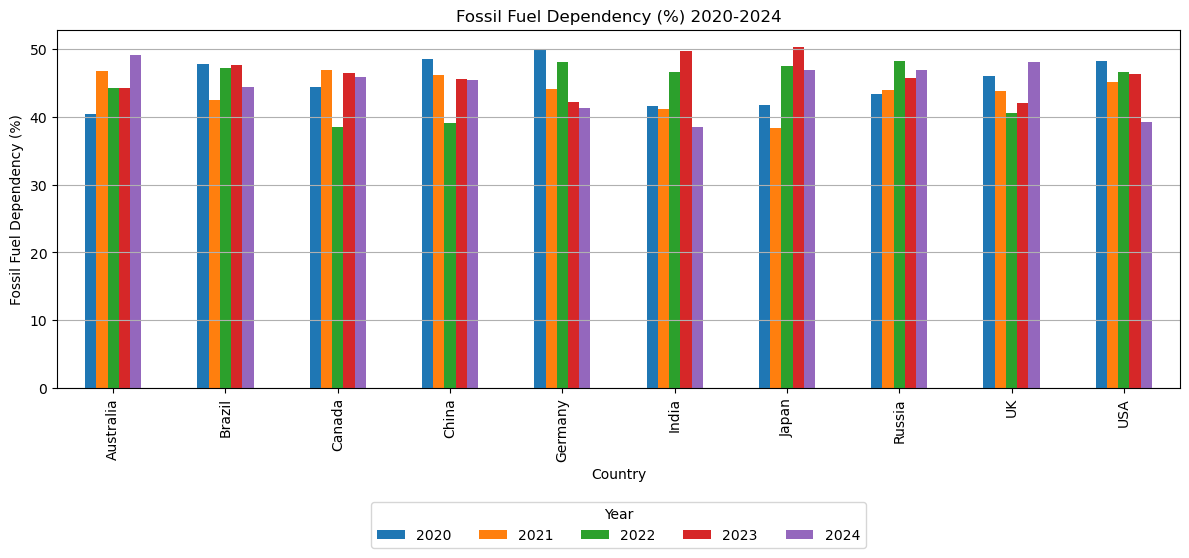

In [223]:

# Handle duplicate entries by aggregating (e.g., calculating the mean)
aggregated_data = filtered_data.groupby(['Country', 'Year']).mean().reset_index()

# Pivot data for bar chart
bar_chart_data = aggregated_data.pivot(index='Country', columns='Year', values='Fossil Fuel Dependency (%)')

# Plot the bar chart
bar_chart_data.plot(kind='bar', figsize=(12, 6))

# Set the legend below the chart
plt.legend(title='Year', loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=5)  # Adjust ncol as needed
plt.xlabel('Country')  # Country on the x-axis
plt.ylabel('Fossil Fuel Dependency (%)')  # Total energy consumption on the y-axis
plt.title('Fossil Fuel Dependency (%) 2020-2024')
plt.grid(axis='y')  # Add gridlines to the y-axis for better readability

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [221]:
# Function to get top 3 countries by Fossil Fuel Dependency for each year
def get_top_3_countries_by_year(dataframe, metric):
    # Group by Year and get the top 3 countries for the metric
    return dataframe.groupby('Year').apply(lambda x: x.nlargest(3, metric)).reset_index(drop=True)

# Get the top 3 countries for Renewable Energy Share (%)
top_3_fossil = get_top_3_countries_by_year(filtered_data, 'Fossil Fuel Dependency (%)')

# Filter to show only the desired columns
top_3_fossil = top_3_fossil[['Country', 'Year', 'Fossil Fuel Dependency (%)','Renewable Energy Share (%)', 'Industrial Energy Use (%)', 'Household Energy Use (%)']]

# Display the results
top_3_fossil

/var/folders/4g/4yj9rs3x2mxd3r_wz6p0pv080000gn/T/ipykernel_4228/1015039861.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return dataframe.groupby('Year').apply(lambda x: x.nlargest(3, metric)).reset_index(drop=True)


,Country,Year,Fossil Fuel Dependency (%),Renewable Energy Share (%),Industrial Energy Use (%),Household Energy Use (%)
0,Germany,2020,49.930400,48.741800,38.630600,23.021400
1,China,2020,48.534857,41.889714,41.311429,26.714000
2,USA,2020,48.218000,51.208667,41.632222,25.823556
3,Canada,2021,46.855870,44.957826,40.982391,24.075652
4,Australia,2021,46.748718,43.379231,38.723077,23.187179
5,China,2021,46.238837,39.195116,43.419302,25.131163
6,Russia,2022,48.300952,50.685714,40.291429,25.000476
7,Germany,2022,48.054889,44.596000,36.970222,26.105111
8,Japan,2022,47.482188,48.611250,40.719375,23.025312
9,Japan,2023,50.385682,54.022045,39.932045,23.650682


In [259]:
# Pivot data for comparison
pivot_data = filtered_data.pivot(index='Country', columns='Year', values='Fossil Fuel Dependency (%)')

# Calculate the increase in Fossil Fuel Dependency from 2020 to 2024
pivot_data['Increase'] = pivot_data[2024] - pivot_data[2020]

# Sort by the largest increase and select the top 3 countries
top_3_countries = pivot_data.sort_values(by='Increase', ascending=False).head(3)

# Display the results
print("Top 3 Countries with Biggest Increase in Fossil Fuel Dependency (%) (2020 vs 2024):\n", top_3_countries)

Top 3 Countries with Biggest Increase in Fossil Fuel Dependency (%) (2020 vs 2024):
 Year            2020       2021       2022       2023       2024  Increase
Country                                                                   
Australia  40.378750  46.748718  44.335250  44.270833  49.088864  8.710114
Japan      41.814857  38.313929  47.482188  50.385682  46.901429  5.086571
Russia     43.394000  44.032105  48.300952  45.802600  46.967500  3.573500


In [265]:
# Pivot data for comparison
pivot_data = filtered_data.pivot(index='Country', columns='Year', values='Fossil Fuel Dependency (%)')

# Calculate the decrease in Renewable Energy Share (%) from 2020 to 2024
pivot_data['Decrease'] = pivot_data[2024] - pivot_data[2020]

# Sort by the biggest decrease and select the top 3 countries
top_3_countries = pivot_data.sort_values(by='Decrease').head(3)

# Display the results
print("Top 3 Countries with Biggest Decrease in Fossil Fuel Dependency (%) (2020 vs 2024):\n", top_3_countries)

Top 3 Countries with Biggest Decrease in Fossil Fuel Dependency (%) (2020 vs 2024):
 Year          2020       2021       2022       2023       2024  Decrease
Country                                                                 
USA      48.218000  45.078235  46.578409  46.290714  39.181892 -9.036108
Germany  49.930400  44.042326  48.054889  42.256579  41.280000 -8.650400
Brazil   47.807778  42.500250  47.268182  47.671379  44.384615 -3.423162
